<a href="https://colab.research.google.com/github/graviada/colabRepo/blob/master/2022/TorchML%20(6%2C%202022)/Lab4/PyTorch_Lab4_1_Manifold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

import torch.optim as optim
from itertools import chain

from torch.utils.data import DataLoader

from torchsummary import summary
from matplotlib import pyplot as plt

In [2]:
# В данной лабораторной работе вам предстоит реализовать и обучить автокодировочную нейронную сеть.
# В этой части в качесте данных для обучения представляются сгенерированные точки на плоскости.
# Цель в том, чтобы получить интуитивное понимание того, как автокодировщик параметризует многообразие,
# в окрестности которого располагаются точки в исходном признаковом пространстве.
# Для этого данные сначала проебразуются обученным кодировщиком, а затем докодируются обратно в исходное пространство.
# В итоге все точки лежат на параметризуемом многообразии (в данном случае, некоторой кривой на плоскости).

class Encoder(nn.Module):
    # Класс кодировщика, необходимо реализовать.

    def __init__(self, inputs, latent_size):
        super().__init__()
        # ВАШ КОД ЗДЕСЬ
        self.encoder = nn.Sequential(
            nn.Linear(in_features=inputs, out_features=latent_size),
            nn.ReLU()
        )
        # ============

    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ
        x = self.encoder(x)
        # ============
        return x

In [3]:
class Decoder(nn.Module):
    # Класс декодировщика, необходимо реализовать.

    def __init__(self, latent_size, outputs):
        super().__init__()
        # ВАШ КОД ЗДЕСЬ
        self.decoder = nn.Sequential(
            nn.Linear(in_features=latent_size, out_features=outputs)
        )
        # ============

    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ
        x = self.decoder(x)
        # ============
        return x

In [4]:
def train_ae(data_loader, encoder, decoder, epochs, lr):
    # Функция для обучения автокодировщика.
    # Принимает на вход загрузчик тренеровочных данных,
    # кодировщик, декодировщик, количество эпох для обучения и скорость обучения.

    encoder.train()
    decoder.train()

    loss_history = list()

    loss_func = nn.MSELoss()  # функция потерь, нужно выбрать.
    optimizer = torch.optim.Adam(chain(encoder.parameters(), decoder.parameters()), lr=1e-3)  # оптимизатор, нужно выбрать.

    for epoch in range(epochs):
        for i, (batch, _) in enumerate(data_loader):
            # ВАШ КОД ЗДЕСЬ
            batch = batch.reshape(batch.shape[0], -1)
            optimizer.zero_grad()
            loss = loss_func(decoder(encoder(batch)), batch)  # потери на пакете, нужно вычислить.
            loss.backward()
            optimizer.step()
            loss_history.append(loss.log().item())
        print(f'Эпоха {epoch + 1} / {epochs}. Потери на последнем пакете: {loss.item()}')

    encoder.eval()
    decoder.eval()

    plt.plot(loss_history)
    plt.show()

In [5]:
# Создаем кодировщик и декодировщик
encoder = Encoder(2, 1)
decoder = Decoder(1, 2)

print('Архитектура кодировщика: ')
summary(encoder, [[2]])
print()
print('Архитектура декодировщика: ')
summary(decoder, [[1]])

Архитектура кодировщика: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               3
              ReLU-2                    [-1, 1]               0
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------

Архитектура декодировщика: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 2]               4
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Param

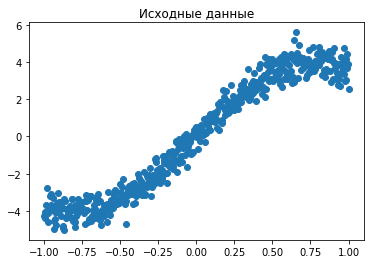

In [6]:
# Генерируем данные
x = torch.linspace(-1, 1, steps=512)
y = 4 * torch.sin(2 * x) + torch.randn(512) / 2

plt.title('Исходные данные')
plt.scatter(x, y)
plt.show()

Эпоха 1 / 500. Потери на последнем пакете: 4.999292850494385
Эпоха 2 / 500. Потери на последнем пакете: 4.476635456085205
Эпоха 3 / 500. Потери на последнем пакете: 4.907238006591797
Эпоха 4 / 500. Потери на последнем пакете: 4.635202407836914
Эпоха 5 / 500. Потери на последнем пакете: 4.0479302406311035
Эпоха 6 / 500. Потери на последнем пакете: 4.144963264465332
Эпоха 7 / 500. Потери на последнем пакете: 4.410606861114502
Эпоха 8 / 500. Потери на последнем пакете: 4.150415897369385
Эпоха 9 / 500. Потери на последнем пакете: 3.1018781661987305
Эпоха 10 / 500. Потери на последнем пакете: 3.803617477416992
Эпоха 11 / 500. Потери на последнем пакете: 3.942274570465088
Эпоха 12 / 500. Потери на последнем пакете: 3.7606124877929688
Эпоха 13 / 500. Потери на последнем пакете: 3.6150901317596436
Эпоха 14 / 500. Потери на последнем пакете: 3.421736717224121
Эпоха 15 / 500. Потери на последнем пакете: 3.1586461067199707
Эпоха 16 / 500. Потери на последнем пакете: 3.17637300491333
Эпоха 17 / 50

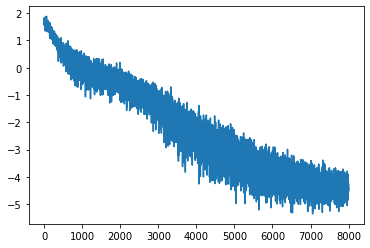

In [7]:
# Готовим обучающие данные
train_data = torch.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
train_data_loader = DataLoader(list(zip(train_data, [torch.tensor(0)] * train_data.shape[0])), batch_size=32, shuffle=True)

# Обучаем автокодировщик
train_ae(train_data_loader, encoder, decoder, 500, 5e-5)

# Прогоняем данные через автокодировщик
restored_data = decoder(encoder(train_data))

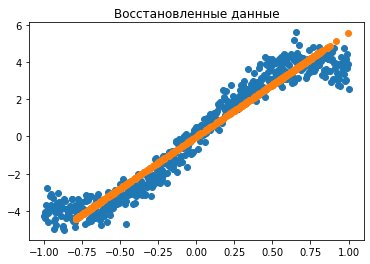

In [8]:
# Отображаем результат
plt.title('Восстановленные данные')
plt.scatter(x, y)
plt.scatter(*zip(*restored_data.detach().numpy()))
plt.show()